# Diabetes Prediction 

**Data Source**:  
Diabetes dataset - Pima Indians. (November 4, 2024). Retrieved from https://www.kaggle.com/datasets/nancyalaswad90/review/data

**The original data collection and analysis source**:
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

## Key Notes  

**List of features and measurement units**:
- pregnancies - int
- glucose - plasma glucose concentration at 2 hrs in an Oral Glucose Tolerance Test (GTT), dg/dL(?)
- blood pressure - diastolic, mmHg
- skin thickness - triceps skin fold thickness, mm
- insulin - 2-hour serum insulin, uU/ml (micro units per milliliter)
- BMI - weight in kg/(height in m)^2
- diabetes pedigree function - a formula described in the publication. it is a unitless value
- age - int
- outcome - 1 = has DM, 0 = does not have DM

# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Read in data

In [3]:
df = pd.read_csv(r"C:\Users\aplor\Documents\GitHub\diabetes-prediction\data\raw\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Basic info including data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Basic descriptive statisitcs of the features

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Percent missing data per variable

In [8]:
df.isna().sum()/len(df)*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

# Number of values that == 0 per feature

In [10]:
zero_counts = (df==0).sum()
zero_counts

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

# Percent of values that are 0 for features where 0 likely means missing values

In [11]:
features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

percent_zero = (df[features]==0).sum()/len(df) * 100
percent_zero

Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
dtype: float64

A value of 0 for features like pregnancies and outcome has a valid meaning.  A value of 0 for the remaining features doesn't make biological sense and indicates that either the value was enetered incorrectly or is missing.  Either way, these values will need to be imputed or dropped.  

# Check for duplicated observations

In [14]:
df.duplicated().sum()

0

# Histogram of features

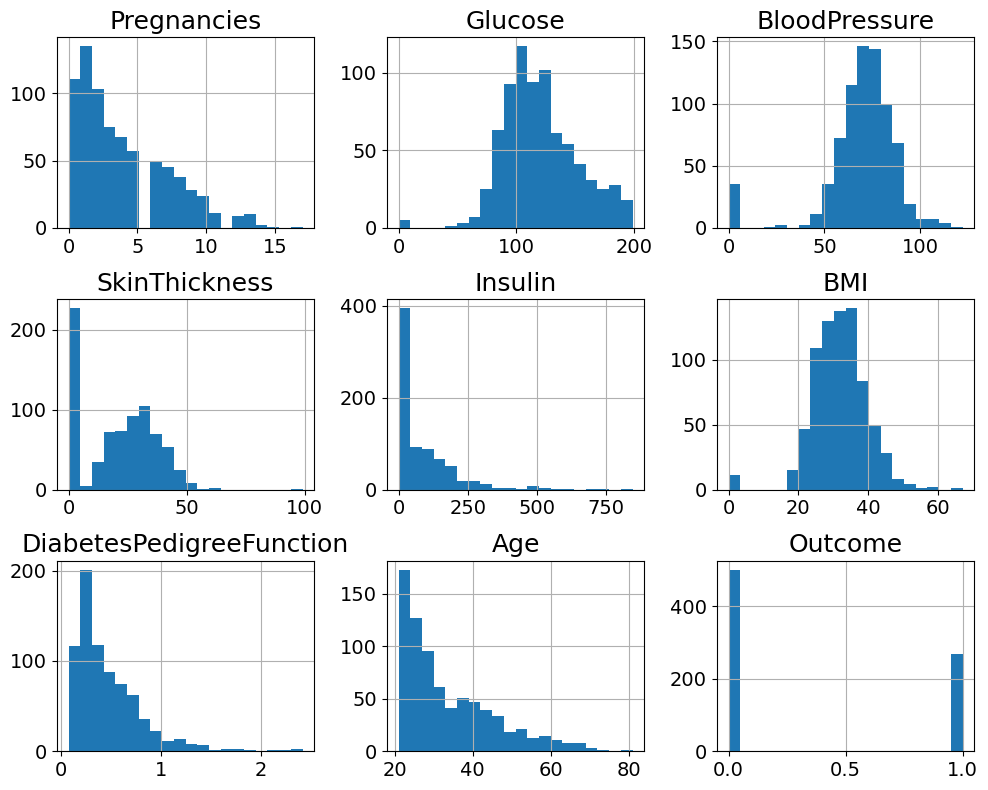

In [24]:
# visualize the distrubutions of the features data 

axes = df.hist(bins=20, figsize=(10,8))

for ax in axes.flatten():
    ax.set_title(ax.get_title(), fontsize=18)
    ax.tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.show()

The histogram provides important information about the distribution of the features' data.  Many of the features are right-skewed, suggesting that a log transformation may be necessary for model computation efficiency. 

The histograms also suggest that the value of 0 likely represents missing data for: 
- glucose
- blood pressure
- skin thickness*
- BMI
- insulin**

*A value of 0 for skin thickness can indicate 'normal' skin thickness, which ranges from 0.5mm to 4mm on average.  However, this study uses the triceps skinfold as a measure of subcutaneous fat.  Measurements in the range of 10-50mm is expected for healthy individuals.  So, 0mm is likely due to missing data.  

**While people with type 1 diabetes can have very low levels of or no insulin, this study is focused on predicting type 2 diabetes and, therefore, will proceed with the assumption that 0 insulin is the lack of data.  

A data imbalance is observed for the outcome variable.  

# Data imbalance

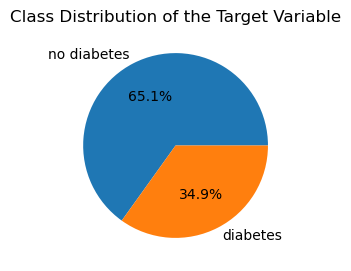

In [33]:
# Determine the balance of the independent variable classes (0 and 1, no diabetes and diabetes)

class_counts = df['Outcome'].value_counts()

plt.figure(figsize = (4,3))
plt.pie(class_counts, labels=['no diabetes', 'diabetes'], autopct='%1.1f%%')
plt.title('Class Distribution of the Target Variable')
plt.show()

Data imbalances for classificaiton is relatively common, especially for topics regarding disease.  Since type 2 diabetes melitus is relatively common, the data imbalance is less severe than for diseases that are more rare.  This imbalance will be taken into account during model fitting.  

# Boxplot

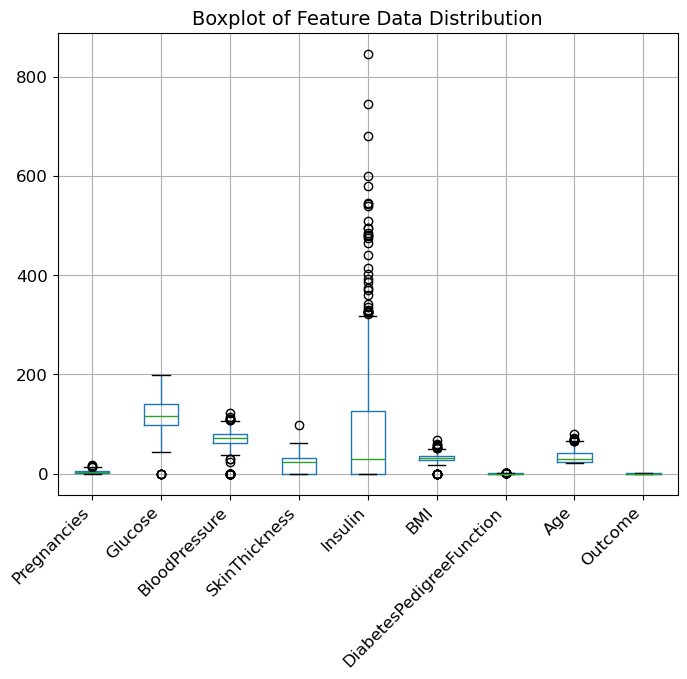

In [27]:
# use a boxplot to better understand the data distribution, especially the numbers and relative magnitude of outliers

df.boxplot(figsize=(8,6))
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Boxplot of Feature Data Distribution', fontsize=14)
plt.show()

There are many outliers for most features, especially blood pressure, insulin, bmi, and age.  A brief exploration of the literature reveals the following levels as average for adult women:

- diastolic blood pressure for healthy adult women should be <80 mmHg

- 2-hour serum insulin levels should range between 16-166 uU/ml
resource: https://emedicine.medscape.com/article/2089224-overview?reg=1&form=fpf#a1

- bmi range of 18.5-24.9 kg/m^2 for women of normal weight 
resource: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8984168/#:~:text=The%20World%20Health%20Organization%20(WHO,kg%2Fm2.18)

I also look up triceps skinfold thickness to understand the expected range of these values.  
- triceps skin fold thickness for women 23.6 +/- 7.5 mm
resource: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9127233/#:~:text=In%20the%20study%20population%2C%20the%20average%20TSF,cm%2C%20and%2032.3%20%C2%B1%204.6%20cm%2C%20respectively.

# Pairplot

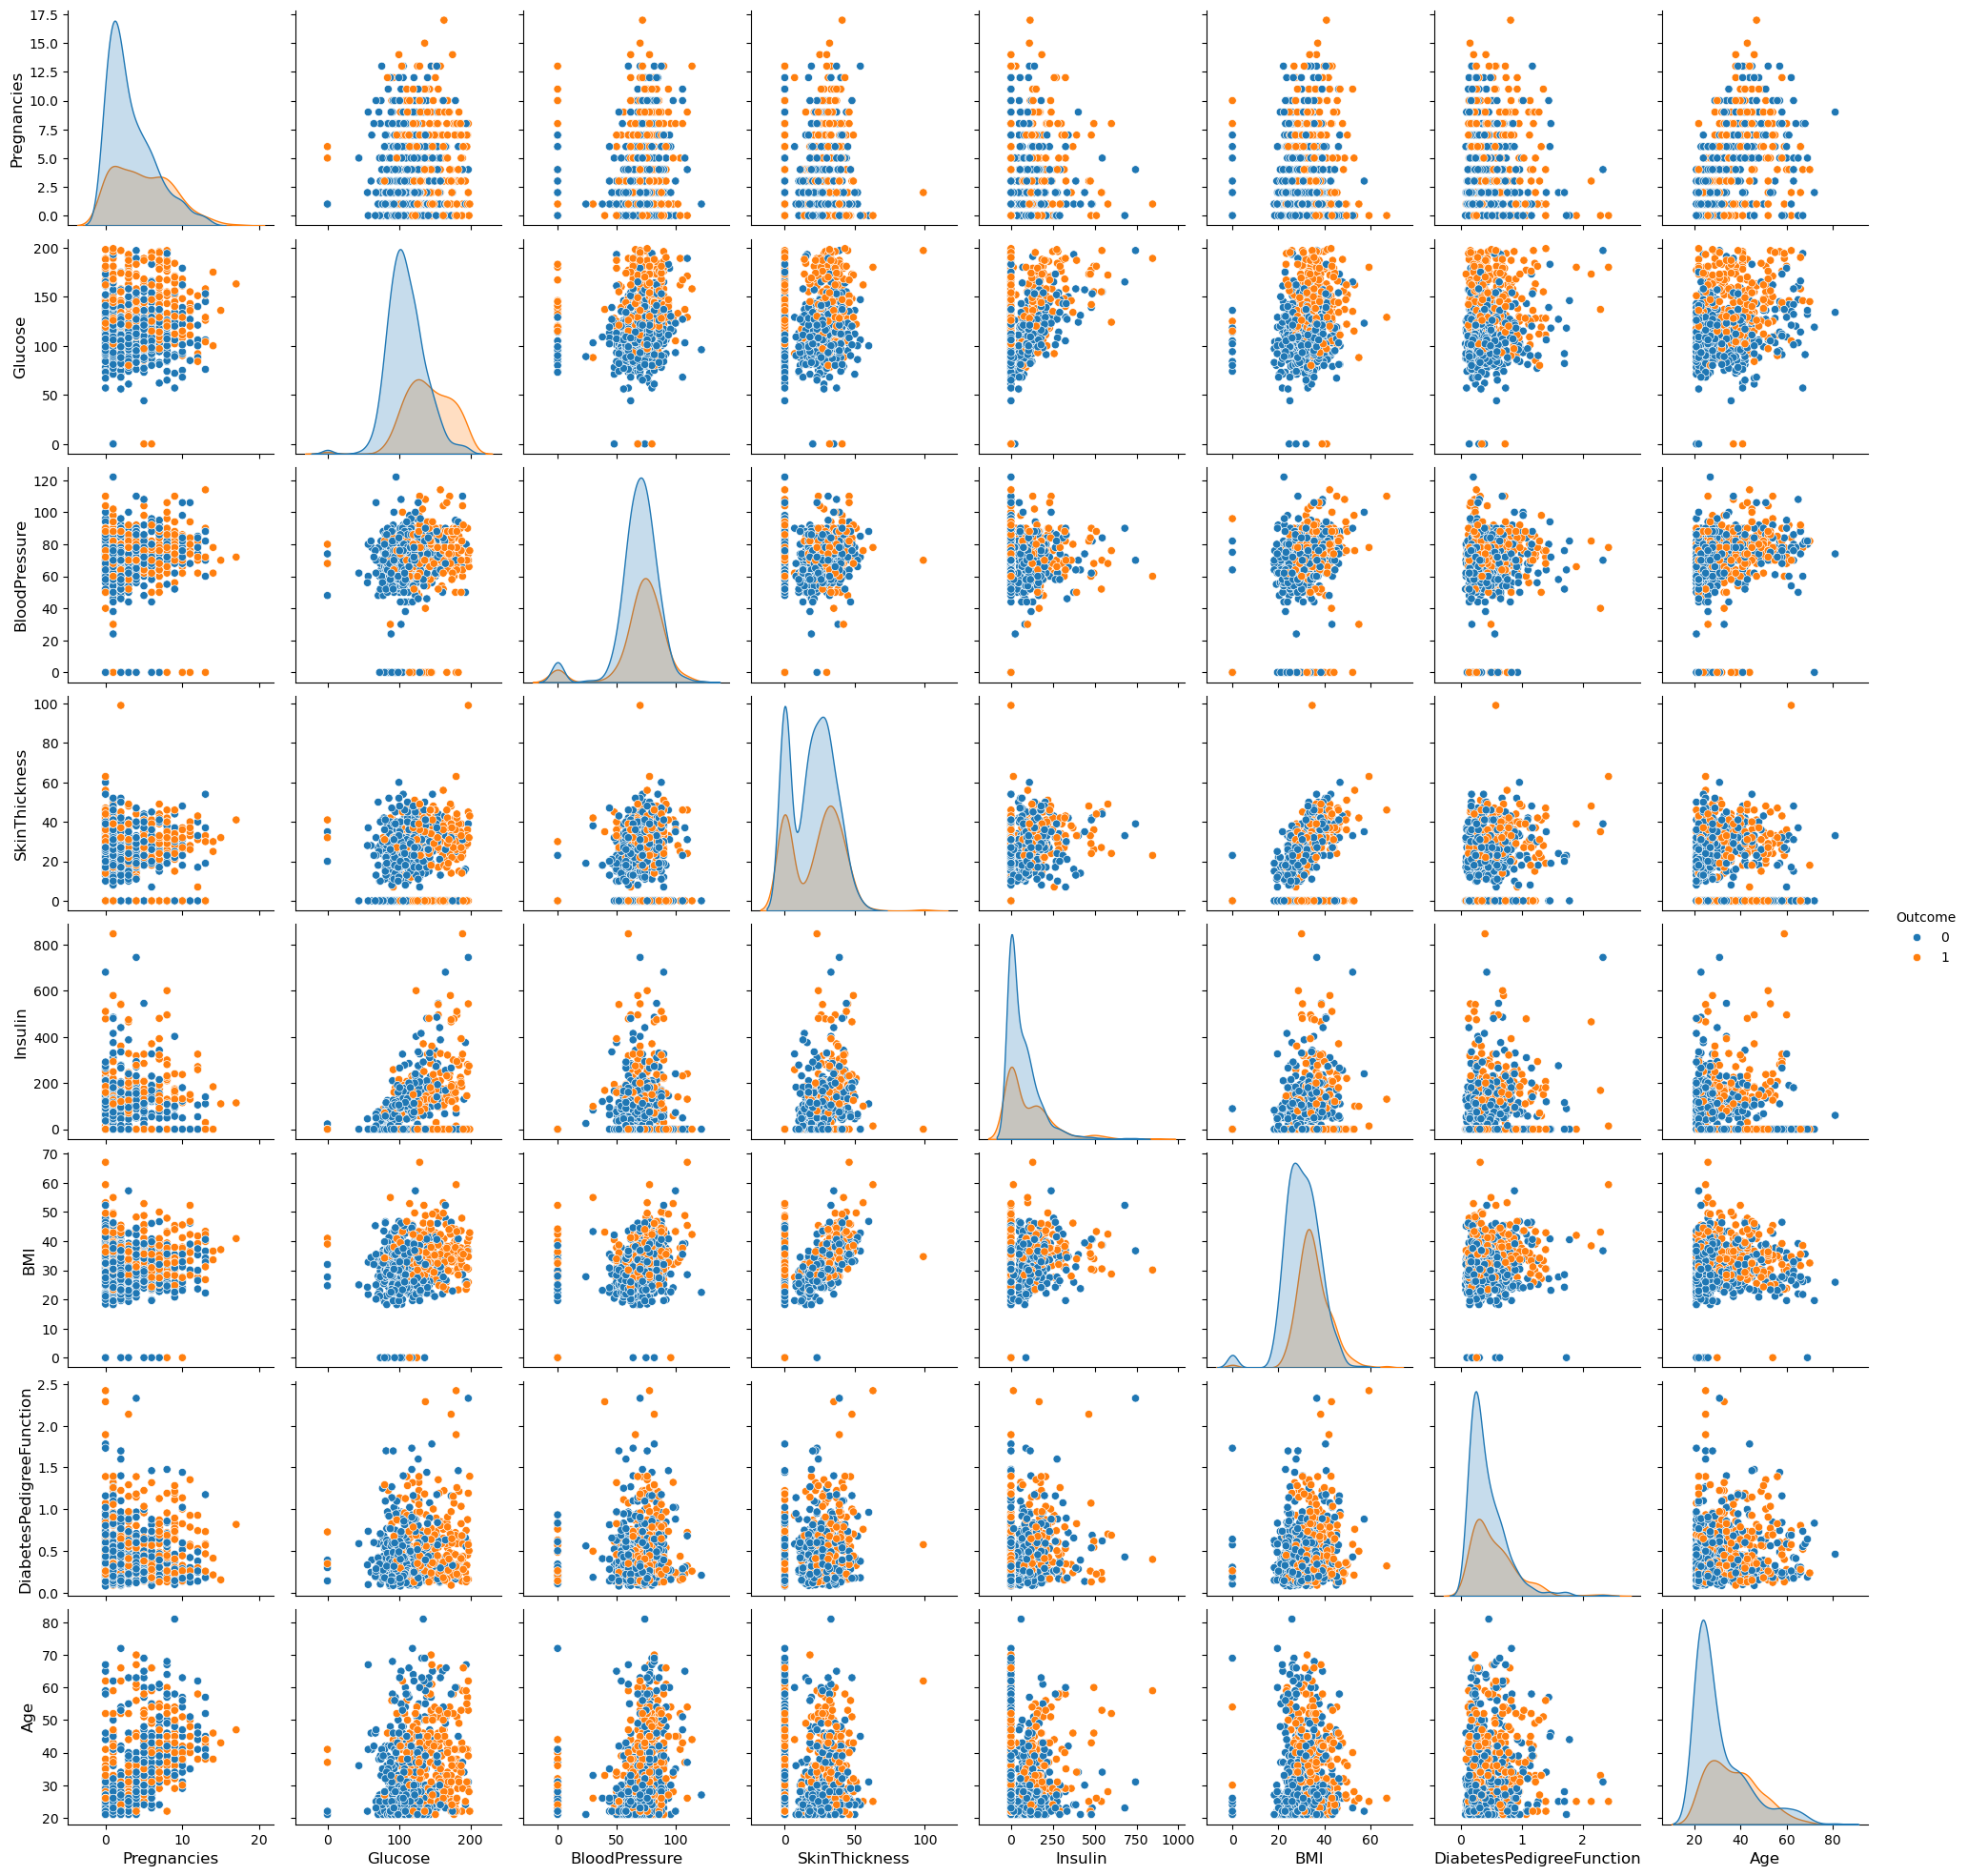

In [30]:
# pairplot of the dataframe to inspect patterns, correlations, and target class separartion

pairplot = sns.pairplot(df, hue='Outcome')

# set the font size for x and y axis labels
for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)

plt.show()

As noted with the histogram plot of the features, glucose and bmi are the most normally distrubted features.  Most are right skewed.  

There is some target class separation in feature combinations, including:
- glucose vs age
- glucose vs diabetes pedigree function
- glucose vs blood pressure
- glucose vs skin thickness
- glucose vs BMI
- glucose vs insulin
- and to a lesser extent, BMI vs age

Glucose seems to be an important feature for target class separation.  

None of the feature combinations show a substantial degree of correlation.  I will plot the correlation matrix to corroborate this observation. 

# Correlation plot

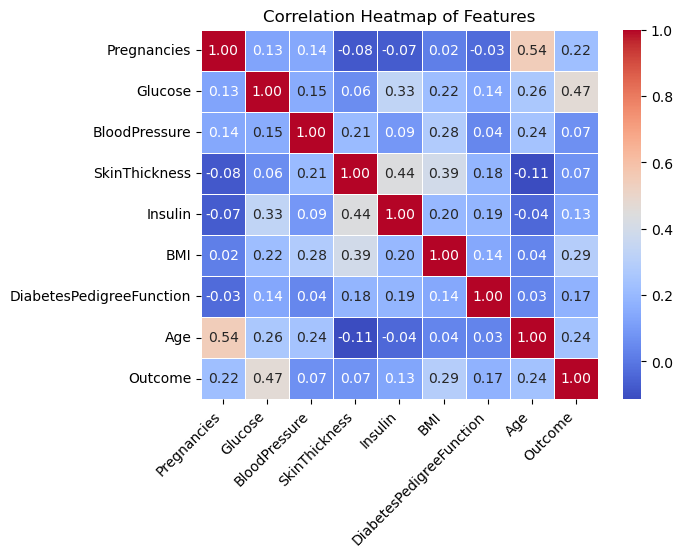

In [32]:
# inspect correlation

plt.figure
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidth=0.5)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Heatmap of Features')
plt.show()

The correlation map corroborates that there is little correlation between any two features.  The greatest correlation are for:
- pregnancies vs age
- glucose vs outcome

As observed in the pairplot, glucose is likely an important feature for predicting type 2 diabetes mellitus

# Mean feature values grouped by outcome

In [36]:
# inspect how the mean values segragate with the target class
# 0 = no diabetes
# 1 = diabetes

mean_df = df.groupby('Outcome').mean()

# calculate the percent difference
percent_diff = ((mean_df.loc[1] - mean_df.loc[0]) / mean_df.loc[0]) * 100

# add the percent difference to the dataframe
mean_df.loc['% Diff'] = percent_diff

mean_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164
% Diff,47.534010,28.439228,3.872795,12.714499,45.853909,15.965897,28.102501,18.843104


The mean of all features are greater for those reported to have diabetes compared to those who are reported to not have diabetes

The difference (increase) is greatest for:
1. pregancies
2. insulin
3. glucose
4. diabetes pedigree function
5. age
6. BMI
7. skin thickness
8. blood pressure

# EDA driven conclusions for modeling and predicting type 2 diabetes mellitus 

**Regarding values of 0**:
- A value of 0 for glucose, blood pressure, skin thickness, and bmi is biologically impossible.
- Rows with 0 values for insulin and skin thickness account for a substantial proportion of the total dataset, and these rows still contain other useful data.

I will impute 0 values instead of removing rows/observations for the following features:

- glucose
- blood pressure
- skin thickness
- insulin 
- bmi 

Since the data is asymmetric and several of these fatures (e.g. blood pressure, insulin, and bmi) have many outliers (prior to imputation), I will impute with the median value for each feature.

**Regarding possible feature engineering**:

I will try feature engineering in hopes of improving the predictive power of the model. Some features alone may not correlate well with a given class, but can be signifant when combined with other features.   
- age*glucose - this could improve the correlation between these important factors for diabetes by enhancing the affects at older age and higher glucose in a non-linear way, compared to each feature alone.
- glucose*BMI - the interaction of glucose and BMI may allow the model to better capture a potentially nonlinear effect of each individual feature.  
- insulin*BMI - similarly, the interaction of serum insulin levels and BMI could imrove the value of these features for predicting class.   
- glucose^2 - glucose has the highest correlation with outcome. 
- BMI^2 - visceral fat is measured at the waist is a better predictor of diabetes than either triceps skin thickness and BMI.  However, waist circumference is not a feature in this set.  BMI is a standard for predicting diabetes due to the ease and reliability of the measurements.
- glucose:insulin ratio - within the context of the 2 hour GTT, the ratio of insulin to glucose should be an indicator of either problems producing insulin (more of a type I issue) vs cellular absorption of glucose (type II).
- bin categories such as glucose, BMI, and insulin.  BMI doesn't have a strong correlation with outcome.  Perhaps binning features into categories will increase the performance of the model.

-- glucose (mg/dl)
https://diabetes.org/about-diabetes/diagnosis#:~:text=Diabetes%20is%20diagnosed%20at%20two,to%20be%20diagnosed%20as%20diabetes.
--- normal = <140 mg/dL
--- prediabetic = 140-199 mg/dL
--- diabetic = >=200 mg/dL

-- BMI (kg/m^2)
https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html
--- underweight: < 18.5 
--- healthy weight: >= 18.5 < 25
--- overweight: >= 25 < 30
--- obesity (class 1): >= 30 < 35
--- obesity (class 2): >=35 < 40
--- obesity (class 3): >=40

-- Insulin (uU/ml)
https://emedicine.medscape.com/article/2089224-overview?reg=1&form=fpf#a1
--- low: < 16
--- normal: >= 16 <= 166
--- high: > 166